In [19]:
#Importing Basic Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
#To get data from dataset
df=pd.read_csv('/content/drive/MyDrive/Projects/ML PROJECT/Tata motors stock price prediction ML project /TATAMOTORS.NS.csv', 
               parse_dates=['Date'],index_col='Date')
#parse_dates is used because Date column is in string so it convert Date column to Timestamp
#index_col is used because it make Date column as index 

#To read first 5 records
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-26,295.000000,297.000000,291.000000,293.149994,293.149994,27502360
2021-07-27,293.000000,297.649994,288.600006,291.399994,291.399994,55132877
2021-07-28,290.000000,290.899994,283.600006,284.450012,284.450012,36139725
2021-07-29,287.549988,295.399994,287.549988,292.899994,292.899994,57733359
2021-07-30,294.000000,300.000000,293.250000,293.950012,293.950012,30589609


In [21]:
#To check total no. of records

df.shape        #(Rows,Columns)

(251, 6)

In [22]:
#To check for index

df.index

DatetimeIndex(['2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06',
               ...
               '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-18',
               '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
               '2022-07-25', '2022-07-26'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

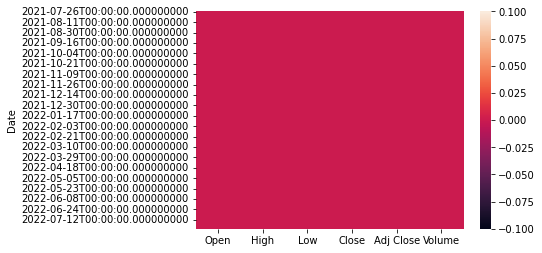

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [23]:
#To check for Null Values

df.isnull().sum()
#visualisation
sns.heatmap(df.isnull())
plt.show()
df.dtypes

In [24]:
#Columns

df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Text(0.5, 1.0, ' Tata Motors Stock Plot for Overall Period')

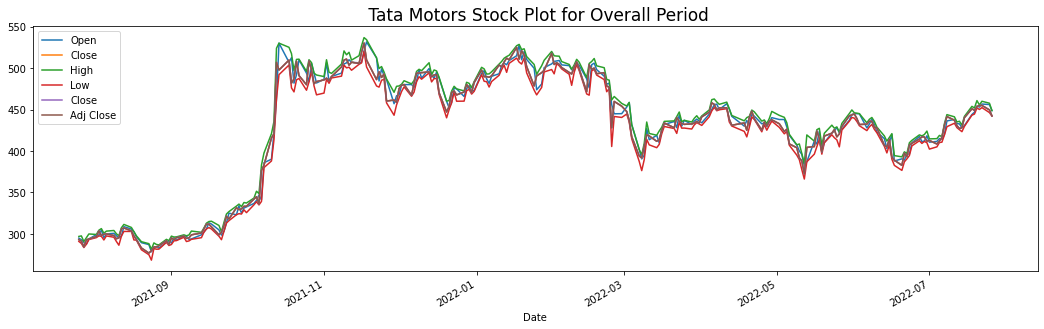

In [25]:
#Plot for all columns
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Tata Motors Stock Plot for Overall Period", fontsize=17)

In [26]:
#Top-5 Dates with Highest Stock Price

a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
2021-11-17    536.700012
2021-11-18    534.200012
2021-10-14    530.000000
2022-01-18    528.500000
2022-01-17    526.900024
Name: High, dtype: float64

In [27]:
#Top-5 Dates with Lowest Stock Price

b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
2021-08-24    268.450012
2021-08-23    275.000000
2021-08-20    281.000000
2021-08-26    281.649994
2021-08-27    281.700012
Name: Low, dtype: float64

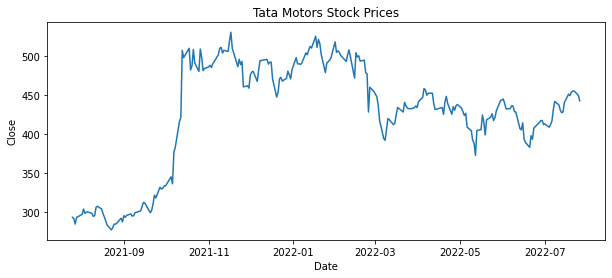

In [28]:
#Plot for Date vs Close

plt.figure(figsize=(10, 4))
plt.title("Tata Motors Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()


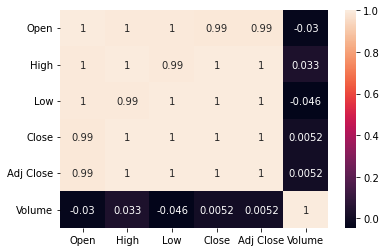

In [29]:
#To check correlation 
sns.heatmap(df.corr(),annot=True)

In [30]:
#Select input and output

X = df[["Open", "High", "Low", "Adj Close"]]
Y = df["Close"]
X = X.to_numpy()
Y = Y.to_numpy()
Y = Y.reshape(-1, 1)

In [31]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [32]:
#Scaling
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #fit is used to train the model
X_test=ss.transform(X_test)

In [33]:
#create a function
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    #find the mean squared error
    print("Mean Squared error : ",mean_squared_error(Y_test,Y_pred))
    #find the r2_score 
    print("R2 Score : ",r2_score(Y_test,Y_pred))
    print("Training score : ",model.score(X_train,Y_train))
    print("Testing score : ",model.score(X_test,Y_test))
    return model,Y_pred

In [34]:
#Given Dataset in Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
#create object of LinearRegression class
lr=LinearRegression()

In [35]:
#call function
lr,Y_pred=create_model(lr)

Mean Squared error :  7.2276266516249335e-28
R2 Score :  1.0
Training score :  1.0
Testing score :  1.0


In [36]:
#Given Dataset in Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [37]:
#call function
dt,Y_pred=create_model(dt)

Mean Squared error :  20.225794739651796
R2 Score :  0.9962558025478631
Training score :  1.0
Testing score :  0.9962558025478631


In [38]:
#Given to Support Vector Regression
from sklearn.svm import SVR
svr = SVR()

In [39]:
#call function
svr,Y_pred=create_model(svr)

Mean Squared error :  2409.6911588881962
R2 Score :  0.5539181716376183
Training score :  0.6163007775141756
Testing score :  0.5539181716376183


In [40]:
#Given to Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3)


In [41]:
#call function
rfr,Y_pred=create_model(rfr)

Mean Squared error :  67.38369313276534
R2 Score :  0.9875259362912123
Training score :  0.9902879615240424
Testing score :  0.9875259362912123


Here in Tata Motors Stock price prediction dataset, we have done analysis and tested to different types of Regression algorithms. Here R2 score (Coefficient of determination) and MSE (Mean Squared Error)  is used to evaluate the performance of the regression model and following are the conclusion ,

Linear Regression: R2 Score = 1.0 , MSE = 7.22

Decision Tree Regression: R2 Score = 0.99 , MSE = 20.22

Support Vector Regression: R2 Score= 0.55 , MSE = 2409.69

Random Forest Regression: R2 Score= 0.98 , MSE = 67.38

#CONCLUSION : 
#We Recommend Linear Regression Algorithm to this model as it has R2 score = 1.0 & MSE = 7.22 which will give a better perfomance. 
 